In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder


In [4]:
df = pd.read_csv('../DataSets/Gender Classification.csv')
df.head()

,Favorite Color,Favorite Music Genre,Favorite Beverage,Favorite Soft Drink,Gender
0,Cool,Rock,Vodka,7UP/Sprite,F
1,Neutral,Hip hop,Vodka,Coca Cola/Pepsi,F
2,Warm,Rock,Wine,Coca Cola/Pepsi,F
3,Warm,Folk/Traditional,Whiskey,Fanta,F
4,Cool,Rock,Vodka,Coca Cola/Pepsi,F


In [5]:
# Check for missing values
print("Missing values in each column:")
print(df.isnull().sum())

Missing values in each column:
Favorite Color          0
Favorite Music Genre    0
Favorite Beverage       0
Favorite Soft Drink     0
Gender                  0
dtype: int64


In [ ]:
encoder = LabelEncoder()
# columns_to_encode = df.select_dtypes(include=['object']).columns
columns_to_encode = ["Favorite Color","Favorite Music Genre","Favorite Beverage","Favorite Soft Drink","Gender"] # Specify the columns you want to encode
for column in columns_to_encode:
    df[column] = encoder.fit_transform(df[column])

df_encoded = pd.get_dummies(df) # This will create new columns for each category in the specified columns and fill them with 0s and 1s

In [14]:
print("Encoded DataFrame:")
print(df_encoded.head())

Encoded DataFrame:
   Favorite Color  Favorite Music Genre  Favorite Beverage  \
0               0                     6                  3   
1               1                     2                  3   
2               2                     6                  5   
3               2                     1                  4   
4               0                     6                  3   

   Favorite Soft Drink  Gender  
0                    0       0  
1                    1       0  
2                    1       0  
3                    2       0  
4                    1       0  


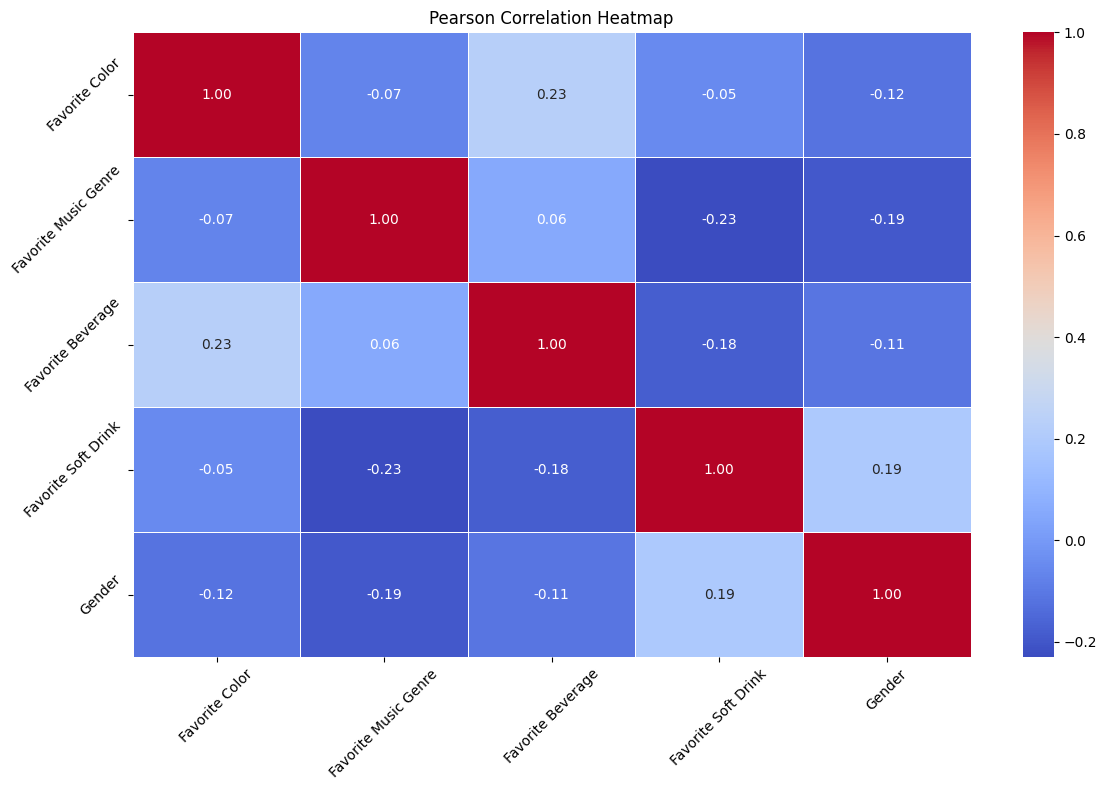

In [15]:
pearson_corr = df_encoded.corr(method='pearson')
plt.figure(figsize=(12,8))
sns.heatmap(pearson_corr,annot=True,fmt=".2f",cmap="coolwarm",linewidths=0.5)
plt.title("Pearson Correlation Heatmap")
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.tight_layout()
plt.show()